In [17]:

import torch
from torch.autograd import Variable
import torch.nn.functional 
import torch.utils.data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import imageio


torch.manual_seed(1)    # reproducible
sns.set_theme(style='darkgrid', palette='deep')

#This example is taken from https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379
# It is  briefly modified



In [48]:

x = torch.unsqueeze(torch.linspace(-12, 12, 300), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x)* torch.exp(-0.1 *x) + 0.5*torch.rand(x.size())       # noisy y data (tensor), shape=(100, 1)


plt.figure(figsize=(10,4))
plt.plot( x, y, '.' , markersize=1.5 )
plt.title('Regression Analysis')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('c1.png')
plt.show()



In [59]:
y.shape

torch.Size([300, 1])

In [54]:

#Architecture

net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

#Optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) 

#Loss function
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 125
EPOCH = 500 #how many times we go through sample

torch_dataset = torch.utils.data.TensorDataset(x, y) #create dataset 

loader = torch.utils.data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)


Epoch:  0  Loss:  0.028149869292974472
Epoch:  10  Loss:  0.058586105704307556
Epoch:  20  Loss:  0.03164791315793991
Epoch:  30  Loss:  0.04277069866657257
Epoch:  40  Loss:  0.03171152248978615
Epoch:  50  Loss:  0.041307348757982254
Epoch:  60  Loss:  0.052860356867313385
Epoch:  70  Loss:  0.0403355248272419
Epoch:  80  Loss:  0.03820989280939102
Epoch:  90  Loss:  0.021794550120830536
Epoch:  100  Loss:  0.043333034962415695
Epoch:  110  Loss:  0.03455782309174538
Epoch:  120  Loss:  0.01672857254743576
Epoch:  130  Loss:  0.023764805868268013
Epoch:  140  Loss:  0.040140002965927124
Epoch:  150  Loss:  0.03380049392580986
Epoch:  160  Loss:  0.06959250569343567
Epoch:  170  Loss:  0.026904813945293427
Epoch:  180  Loss:  0.0600166991353035
Epoch:  190  Loss:  0.05172567069530487
Epoch:  200  Loss:  0.03630270063877106
Epoch:  210  Loss:  0.031824126839637756
Epoch:  220  Loss:  0.03064887225627899
Epoch:  230  Loss:  0.04423407092690468
Epoch:  240  Loss:  0.03399430587887764
Epo

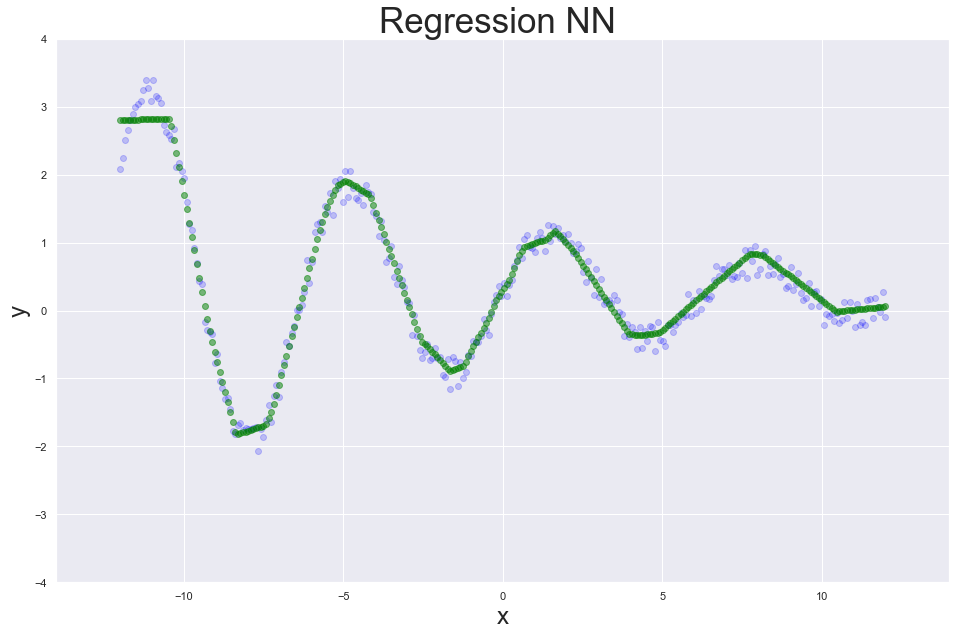

In [58]:
#Training 


my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (bx, by) in enumerate(loader): # for each training step
    
        #bx: batch x
        #by: batch y
        prediction = net(bx)     # input x and predict based on x

        loss = loss_func(prediction, by)  #Calculate loss given nnoutput, target
        
        optimizer.zero_grad()   # clear gradients for next train (ALWAYS!)
        loss.backward()         # backpropagation, compute gradients <3
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla() #clear current axes
            ax.set_title('Regression NN ', fontsize=35)
            ax.set_xlabel('x', fontsize=24)
            ax.set_ylabel('y', fontsize=24)
            ax.set_xlim(-14.0, 14.0)
            ax.set_ylim(-4, 4)
            ax.scatter(bx.data.numpy(), by.data.numpy(), color = "blue", alpha=1 )
            ax.scatter(bx.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -1.2, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
    
    if epoch %10==0:
        print('Epoch: ',epoch, ' Loss: ',  loss.item())
        



# save images as a gif    
imageio.mimsave('./c2.gif', my_images, fps=12)


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Regression NN ', fontsize=35)
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_xlim(-14.0, 14.0)
ax.set_ylim(-4, 4)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)

prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.savefig('c2.png')
plt.show()
